# SRCNN : 学習処理結果  
.npyフォーマットで保存した計算過程をグラフ化する  
学習過程のPSNR(dB)遷移グラフを表示する  

In [1]:
import os
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt

dBhistory_file = 'dBhistory.npy'

### BICUBIC拡大縮小劣化画像：学習過程のPSNR(dB)グラフ  
縦軸：PSNR(dB)  
横軸：epoch 50000エポックを500エポックごとにdBを表示    

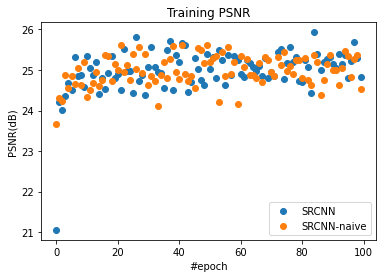

Training PSNR   SRCNN            MAX/MIN = 25.930853/21.054409
Training PSNR   SRCNN-naive      MAX/MIN = 25.624722/23.668208


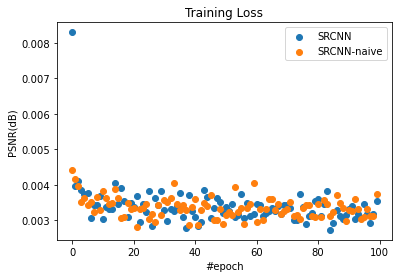

Training Loss   SRCNN            MAX/MIN = 0.008304/0.002731
Training Loss   SRCNN-naive      MAX/MIN = 0.004427/0.002807


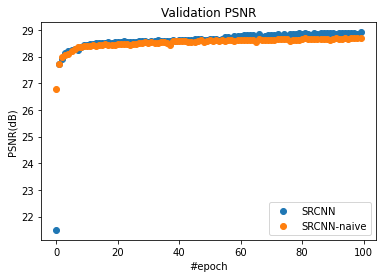

Validation PSNR SRCNN            MAX/MIN = 28.913282/21.498394
Validation PSNR SRCNN-naive      MAX/MIN = 28.709858/26.778449


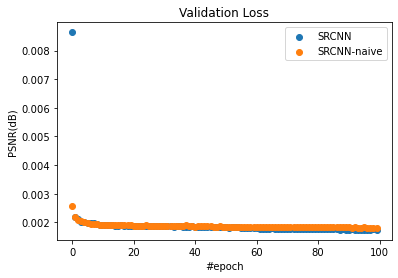

Validation Loss SRCNN            MAX/MIN = 0.008640/0.001733
Validation Loss SRCNN-naive      MAX/MIN = 0.002553/0.001805


In [2]:
dBhistory_files = [str(d) for d in Path('result').glob('*/'+dBhistory_file)]
dBhistory_files = ['result/SRCNN/dBhistory.npy','result/SRCNN-naive/dBhistory.npy']
trainLossCol, trainPSNRCol, valLossCol, valPSNRCol = [i for i in range(4)]
resTrainPSNR = {}
resTrainLoss = {}
resValPSNR   = {}
resValLoss   = {}
for dBhistory in dBhistory_files:
    dB = np.load(dBhistory,allow_pickle=True)
    job = os.path.dirname(dBhistory).split('/')[-1]
    resTrainPSNR[job] = dB[:,trainPSNRCol]
    resTrainLoss[job] = dB[:,trainLossCol]
    resValPSNR[job]   = dB[:,valPSNRCol]
    resValLoss[job]   = dB[:,valLossCol]

def Plotting(title, resultdB):
    # scatter
    for k in resultdB.keys():
        data = resultdB[k]
        plt.scatter(range(len(data)), data)
    plt.title(title)
    plt.legend(resultdB.keys())
    plt.xlabel("#epoch")
    plt.ylabel("PSNR(dB)")
    plt.show()
    for k in resultdB.keys():
        data = resultdB[k]
        print("{:16s}{:16s} MAX/MIN = {:.6f}/{:.6f}".format(title,k,max(resultdB[k]),min(resultdB[k])))
    
if len(resTrainPSNR)==0:
    print('Error : Shown Data not found!')
else:
    Plotting('Training PSNR',   resTrainPSNR)
    Plotting('Training Loss',   resTrainLoss)
    Plotting('Validation PSNR', resValPSNR)
    Plotting('Validation Loss', resValLoss)

### 考察 学習編
**凡例と実行条件**  
SRCNN-naive : 特徴抽出層カーネルを9x9の１種類持つモデル。学習時データ拡張*無し*  
SRCNN：　　特徴抽出層カーネルを9x9の１種類持つモデル。学習時データ拡張*あり*  
SRCNN-c11：特徴抽出層カーネルを9x9と*11x11の２種類*持つモデル。学習時データ拡張*あり*  

**PSNR比較**  
PSNRは、SRCNN > SRCNN-c11 > SRCNN-naiveであり、*SRCNNが最大値*となった。11x11カーネル版の改善効果無し。計算量の増加無しで、11x11カーネル(32ch)を追加するために、9x9カーネル処理量を半分とした(64→32ch)ことが原因と推測される.  
SRCNNに代表される自己教師あり学習は劣化方式、今回はBICUBLIC、を学習しており、別の劣化方式での汎用性に限界があると考えられる。すなわち、9x9カーネルはBICUBLICかつ96x96パッチサイズに適したカーネルサイズであり、11x11のカーネルは今回の画像劣化方式に適さないため改善効果が見られないとも考えられる。  
testview.ipynbに、テスト用画像によるテスト結果と画像劣化方式として生写真の劣化に見られるセピア調色褪せをモデル化した追試を示す  

### JPEG圧縮＋BICUBIC拡大縮小劣化画像：学習過程のPSNR(dB)グラフ  
縦軸：PSNR(dB)  
横軸：epoch 50000エポックを500エポックごとにdBを表示    

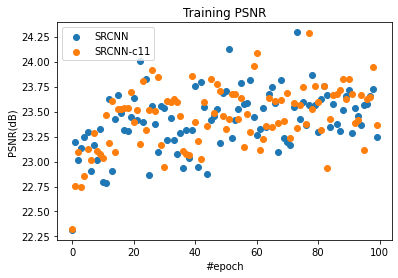

Training PSNR   SRCNN            MAX/MIN = 24.293758/22.315655
Training PSNR   SRCNN-c11        MAX/MIN = 24.288301/22.328830


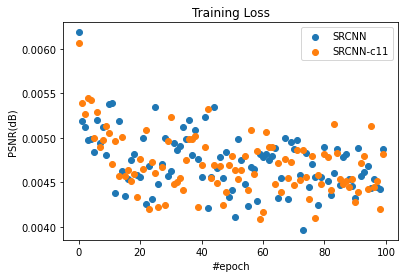

Training Loss   SRCNN            MAX/MIN = 0.006187/0.003967
Training Loss   SRCNN-c11        MAX/MIN = 0.006071/0.004087


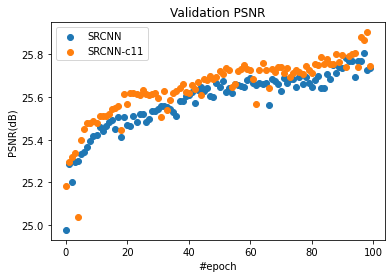

Validation PSNR SRCNN            MAX/MIN = 25.805046/24.977516
Validation PSNR SRCNN-c11        MAX/MIN = 25.903455/25.036379


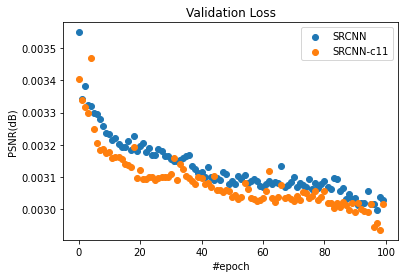

Validation Loss SRCNN            MAX/MIN = 0.003549/0.002998
Validation Loss SRCNN-c11        MAX/MIN = 0.003469/0.002936


In [4]:
dBhistory_files = [str(d) for d in Path('result').glob('*/'+dBhistory_file)]
dBhistory_files = ['result-comp10/SRCNN/dBhistory.npy','result-comp10/SRCNN-c11/dBhistory.npy']
trainLossCol, trainPSNRCol, valLossCol, valPSNRCol = [i for i in range(4)]
resTrainPSNR = {}
resTrainLoss = {}
resValPSNR   = {}
resValLoss   = {}
for dBhistory in dBhistory_files:
    dB = np.load(dBhistory,allow_pickle=True)
    job = os.path.dirname(dBhistory).split('/')[-1]
    resTrainPSNR[job] = dB[:,trainPSNRCol]
    resTrainLoss[job] = dB[:,trainLossCol]
    resValPSNR[job]   = dB[:,valPSNRCol]
    resValLoss[job]   = dB[:,valLossCol]

def Plotting(title, resultdB):
    # scatter
    for k in resultdB.keys():
        data = resultdB[k]
        plt.scatter(range(len(data)), data)
    plt.title(title)
    plt.legend(resultdB.keys())
    plt.xlabel("#epoch")
    plt.ylabel("PSNR(dB)")
    plt.show()
    for k in resultdB.keys():
        data = resultdB[k]
        print("{:16s}{:16s} MAX/MIN = {:.6f}/{:.6f}".format(title,k,max(resultdB[k]),min(resultdB[k])))
    
if len(resTrainPSNR)==0:
    print('Error : Shown Data not found!')
else:
    Plotting('Training PSNR',   resTrainPSNR)
    Plotting('Training Loss',   resTrainLoss)
    Plotting('Validation PSNR', resValPSNR)
    Plotting('Validation Loss', resValLoss)